# Last Time:  Wrangling and Data Preparation

* Get familiar with data: correlation, visualization, groupby
* Data Cleaning: null value replacement, nominal->numeric conversion, (dropping values)
* Feature Selection: selecting attributes, (creating attributes)
* Scikit-Learn
  * Logistic Regression
  * Decision Tree
* Submit to Kaggle

# Prior to That:
* Virtualenv, python packages/requirements.txt, Jupyter Notebook, git, PS shell scripts, (Microsoft VS-Code)



# Today: Decision Trees

I am following "Machine Learning" (Tom M. Mitchell)

* http://www.cs.cmu.edu/~tom/mlbook.html
* https://www.amazon.com/Learning-McGraw-Hill-International-Editions-Computer/dp/0071154671/ref=sr_1_3?keywords=machine+learning+mitchell&qid=1566387805&s=gateway&sr=8-3

"Decision Tree Learning" (Chapter 3)

And content from scikit-learn.org
* https://scikit-learn.org/stable/modules/tree.html


# Introduction
* Method for learning discrete-valued target
* Discrete-valued attributes used directly, numeric are converted 
* DTs are widely used and practical


### Ross Quinlan

* ID3 (1986)
* C4.5  (J4.8 is open source Java-based implementation used in WEKA)
* C5.0

https://www.rulequest.com/Personal/
    

## Representation
* Each node tests an attribute, each branch is a value of the attribute
* Classification starts at root, test at each level.
* Leaf assigns the result.
* Tree can be represented as set of if-then-rules
    
  <diagram>
    
    

### Example: Decision Tree for concept *Play Tennis* (adapted from the 1986 paper)


* Attributes:
 * Outlook [Sunny, Overcast, Rain]
 * Humidity [High Normal]
 * Wind [Strong, Weak]
* Class:
 * Play Tennis [Yes, No]

![alt text](images/mitchell_3_1.png "Play Tennis")

#### Outlook=Sunny, Temperature=Hot, Humidity=High, Wind=Strong
#####    ==>    Play Tennis = No

 #### Can be expressed as a *Disjunction of Conjunction*
    Play Tennis = 
    
    (Outlook = Sunny ^ Humidity = Normal) v
    
    (Outlook = Overcast) v
    
    (Outlook = Rain ^ Wind = Weak)

Mention along the way:  "Zero-R", "One-R" trees

# ---------------------------------

# Learning Algorithm
1. Choose attribute to be tested at the root of the tree
2. Descendent nodes created for each value of the attribute
3. Repeat

*Top-down greedy search with no backtracking*


### Pseudocode
![alt text](images/mitchell_table_3_1.png)

# Outline
* Which Attribute is the Best Classifier?
* Overfitting / Tree Depth / Pruning
* Numeric Attributes...
* Attributes with Differing Costs


## Entropy and Information Gain

Entropy is a measure of homogenity of categorical data

https://en.wikipedia.org/wiki/Entropy_(information_theory)


In [2]:
import numpy as np
from scipy.stats import entropy

# eight possible values - no homogeniety (completely diverse)
labels = [1,2,3,4,5,6,7,8, 1,2,3,4,5,6,7,8, 1,2,3,4,5,6,7,8]
value,counts = np.unique(labels, return_counts=True)
print(entropy(counts, base=2))

# eight possible values - some homogeniety
labels = [1,2,3,4,5,6,7,8, 1,1,1,1,1,1,1,1, 1,1,1,1,1,1,1,1]
value,counts = np.unique(labels, return_counts=True)
print(entropy(counts, base=2))



3.0
1.689676321502166


### Review: 
Log2(value) is the number of bits required to encode using base-2 encoding

* Log2(16) = 4

* Log2(8) = 3

* Log2(4) = 2

* Log2(2) = 1

* Log2(1) = ?

* Log2(0.9) = ?



In [3]:
print(np.log2(16))
print(np.log2(8))
print(np.log2(4))
print(np.log2(2))
print(np.log2(1))
print(np.log2(0.9))


4.0
3.0
2.0
1.0
0.0
-0.15200309344504995


### Entropy

![alt text](images/mitchell_3_3.png "Entropy")


Entropy is the sum of the number of bits needed to encode each value the variable can take, weighted by the frequency of that value.



In [4]:
h = (17/24) * np.log2(17/24) + 7 * (1/24) * np.log2(1/24)
print(h)

-1.6896763215021655


# Q: Which attribute should be tested at the root of the tree?
## A: The one that provides the greatest reduction in entropy


### Information Gain
Information Gain is the reduction in entropy caused by partitioning the examples according to an attribute A


![alt text](images/mitchell_3_4.png "Information Gain")

where
* S = collection of examples
* A = an attribute
* Sv = subset of S for which attribute A has value v

### Note:
* The first term is entropy of the original collection S

* The second term is expected value of entropy after S is partitioned using attribute A

* The second term is the sum of entropies of each subset Sv weighted by the fraction of examples that belong to Sv





# ---------------------------------

# Outline
* ~~Which Attribute is the Best Classifier?~~
* Overfitting / Tree Depth / Pruning
* Numeric Attributes...
* Attributes with Differing Costs
    

# ---------------------------------

## Overfitting
The ID3 Algorithm generates branches until the training data is perfectly predicted.

This can lead to overfitting becuase too few training examples at the leaf nodes (not representative and/or subject to noise)

### ID3 Medical Patient / Diabetes Dataset

![alt text](images/mitchell_figure_3_6.png "Overfitting")

Approaches to stopping:
* Stop early (before reaching perfect classification)
* Post-pruning

Criterion for final tree size:
    
* Use separate examples (validation data / "Reduced Error Pruning - Quinlan 1987)"
* Use all data, but evaluate specific node using statistical test (similar to "Bootstrap"?)
* Explicit Measure of complexity (regularization)

### ID3 Medical Patient / Diabetes Dataset

![alt text](images/mitchell_figure_3_7.png "Overfitting")

# ---------------------------------

# Outline
* ~~Which Attribute is the Best Classifier?~~
* ~~Overfitting / Tree Depth / Pruning~~
* Numeric Attributes...
* Attributes with Differing Costs

# ---------------------------------

## Numeric Attributes


### Example:
* Sort by value
* Identify change in target class (thresholds)
* Evaluate using information gain for each
* Establish nominal attribute using threshold to create categories

Several references in text

![alt text](images/mitchell_page72.png "Numeric Attribute")

# Scikit
### *DecisionTreeClassifier* is a class capable of performing multi-class classification on a dataset.


In [30]:
from sklearn import tree
X = [[0, 0], [1, 1], [2,0]] # [["red", "round"], ["yellow", "long"], ["orange", "round"]]
Y = [0, 1, 2]               # [    "apple",            "banana",            "orange"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [31]:
clf.predict([[0,0],[1, 1],[2,0]])

array([0, 1, 2])

In [32]:
import graphviz

[Text(133.92000000000002, 181.2, 'X[0] <= 0.5\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

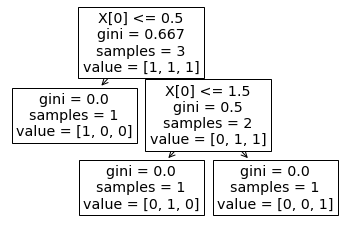

In [34]:
tree.plot_tree(clf)

In [35]:
# sklearn gymnastics for categorical data
# see https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree
# good video https://www.youtube.com/watch?v=0s_1IsROgDc
    
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

data = pd.DataFrame(np.array([['red', 'round', 'apple'],
                              ['yellow', 'long', 'banana'],
                              ['orange', 'round', 'orange']]),
             columns=['Color', 'Shape', 'Type'])
data

,Color,Shape,Type
0,red,round,apple
1,yellow,long,banana
2,orange,round,orange


In [36]:
data_X = data[['Color', 'Shape']]
data_Y = data[['Type']]
data_one_hot_X = pd.get_dummies(data_X, columns=['Color', 'Shape'], drop_first=True)
data_one_hot_Y = pd.get_dummies(data_Y, columns=['Type'], drop_first=True)

In [37]:
data_one_hot_X

,Color_red,Color_yellow,Shape_round
0,1,0,1
1,0,1,0
2,0,0,1


In [38]:
data_one_hot_Y

,Type_banana,Type_orange
0,0,0
1,1,0
2,0,1


In [39]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data_one_hot_X, data_one_hot_Y)

[Text(200.88000000000002, 181.2, 'X[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [[2, 1]\n[2, 1]]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 0.5\ngini = 0.25\nsamples = 2\nvalue = [[2, 0]\n[1, 1]]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [[0, 1]\n[1, 0]]')]

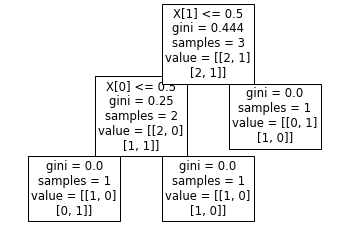

In [40]:
import graphviz 
tree.plot_tree(clf)

In [41]:
clf.predict([[1,0,1],[0, 1, 0],[0, 0, 1]])
#clf.predict([[0,0],[1, 1],[2,3]])


array([[0, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [42]:
import pandas as pd
d = pd.DataFrame(np.array([
    ["Sunny",    "Hot",  "High",   "Weak",   "No" ],
    ["Sunny",    "Hot",  "High",   "Strong", "No" ],
    ["Overcast", "Hot",  "High",   "Weak",   "Yes"],
    ["Rain",     "Mild", "High",   "Weak",   "Yes"],
    ["Rain",     "Cool", "Normal", "Weak",   "Yes"],
    ["Rain",     "Cool", "Normal", "Strong", "No" ],
    ["Overcast", "Cool", "Normal", "Strong", "Yes"],
    ["Sunny",    "Mild", "High",   "Weak",   "No" ],
    ["Sunny",    "Cool", "Normal", "Weak",   "Yes"],
    ["Rain",     "Mild", "Normal", "Weak",   "Yes"],
    ["Sunny",    "Mild", "Normal", "Strong", "Yes"],
    ["Overcast", "Mild", "High",   "Strong", "Yes"],
    ["Overcast", "Hot",  "Normal", "Weak",   "Yes"],
    ["Rain",     "Mild", "High",   "Strong", "No" ]]),
             columns=['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis'])

d

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [43]:
X = d[["Outlook", "Temperature", "Humidity", "Wind"]]
Y = d[["PlayTennis"]]
oh_X = pd.get_dummies(X, columns=["Outlook", "Temperature", "Humidity", "Wind"], drop_first=True)
oh_Y = pd.get_dummies(Y, columns=["PlayTennis"], drop_first=True)

In [44]:
oh_X

,Outlook_Rain,Outlook_Sunny,Temperature_Hot,Temperature_Mild,Humidity_Normal,Wind_Weak
0,0,1,1,0,0,1
1,0,1,1,0,0,0
2,0,0,1,0,0,1
3,1,0,0,1,0,1
4,1,0,0,0,1,1
5,1,0,0,0,1,0
6,0,0,0,0,1,0
7,0,1,0,1,0,1
8,0,1,0,0,1,1
9,1,0,0,1,1,1


In [45]:
oh_Y

,PlayTennis_Yes
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [46]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(oh_X, oh_Y)

[Text(167.40000000000003, 195.696, 'X[4] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(100.44000000000001, 152.208, 'X[1] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(66.96000000000001, 108.72, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(100.44000000000001, 65.232, 'X[5] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(133.92000000000002, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(234.36, 152.208, 'X[0] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(200.88000000000002, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(267.84000000000003, 108.72, 'X[5] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(234.36, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),

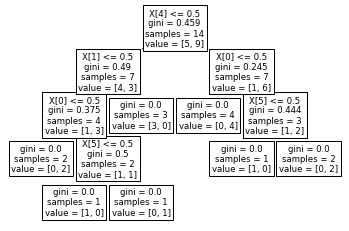

In [47]:
import graphviz 
tree.plot_tree(clf)

In [48]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [49]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [50]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

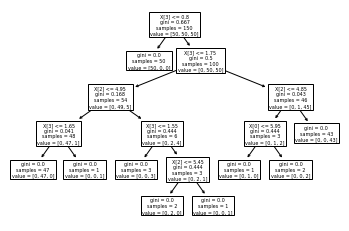

In [51]:
tree.plot_tree(clf.fit(iris.data, iris.target)) 

# -------------------------------------------------------------------------

# The above is not satisfying:

* It is our responsibility to map to one-hot
* It is our responsibilty to map back
* The one-hot representation is almost meaningless  (x[4] < 0.5)
* Attribute labels are gone - "0" and "1" for all attriutes
* Tree is binary - not the n-branch tree we expected
* A new attribute for each value of the original attributes (lots of them!)
* One value missing from each attribute!
* Cannot(?) generate Disjunction of Conjunction (or can we?)
* No visibility into the process...
* Limited control of the process

Not improving Python skills... <-------------

# Options:


Dig further into switches/internals of Scikit: 

* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

* https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
        

Write our own ID3 from the Pseudocode above <---------

In [53]:
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# ------------------------------------------------------------------

# ------------------------------------------------------------------

# Entropy (Fishing Example)
Each day you fish until you have caught 100 fish.  You need to telegraph to shore what you caught.

Typical day:
* Groundfish (98 in 100)
* Shark  (1 in 100)
* Tuna (1 in 100)

### Encoding 1:
| Value | Encoding |
| :------------- | :----: |
| 1 (Groundfish) | "00" |
| 2 (Shark) | "01" |
| 3 (Tuna) | "10" |

* Exactly 2 bits per fish.
* To transmit data for 100 fish would take 200 bits.

### Encoding 2:
| Value | Encoding |
| :------------- | :----: |
| 1 (Groundfish) | "0" |
| 2 (Shark) | "10" |
| 3 (Tuna) | "11" |

* The number of bits reflects the frequency of that data value.
* For 100 fish it would be ~101 bits.

### Encoding 3:
| Value | Encoding |
| :------------- | :----: |
| 1 (Groundfish) | "" |
| 2 (Shark) | "0" |
| 3 (Tuna) | "1" |

* For 100 fish it would be ~2 bits.

*There is a lot of homogeniety in the fish data.  Entropy is a measure of homogeniety.*

# Fishing Case 1

$$S=-\sum_{i=1}^{8} \ (3/24)  log_2( 3/24)$$

# Fishing Case 2

$$S=   (17/24)log_2(17/24) + \sum_{i=2}^{8} \ (1/24)  log_2( 1/24)$$



# ------------------------------------------------------------------

## Cross-Entropy?
Note there are two things:

* The distribution on which the encoding is based
* The distribution of the data to be encoded
    
What is co-variance ?

# ------------------------ junk -----------------------------------------

In [55]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

data = pd.DataFrame(np.array([['red', 'round', 'apple'],
                              ['yellow', 'long', 'banana'],
                              ['orange', 'round', 'orange']]),
             columns=['Color', 'Shape', 'Type'])

In [59]:
data["Color"].nunique()    

3

In [60]:
data.nunique()

Color    3
Shape    2
Type     3
dtype: int64

In [62]:
data["Type"].nunique()


3

In [64]:

data = pd.DataFrame(np.array([['red', 'round', 'apple']]),
             columns=['Color', 'Shape', 'Type'])
data["Type"].nunique()

1

In [66]:
data["Type"][0]

'apple'